# import packages and data set

In [103]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
f=pd.read_csv('E:\project\df\kidney_disease.csv')
l1=["id","age","bp","sg","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc"]
l2=["al","su","rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane","classification"]
#converting numeric values of object type to numeric
f.pcv=pd.to_numeric(f.pcv,errors='coerce')
f.wc=pd.to_numeric(f.wc,errors='coerce')
f.rc=pd.to_numeric(f.rc,errors='coerce')
#replacing similar values with unique values
for i in l2:
    print(f[i].unique())
f.dm=f.dm.replace(to_replace='\tno',value='no')
f.dm=f.dm.replace(to_replace='\tyes',value='yes')
f.dm=f.dm.replace(to_replace=' yes',value='yes')
f.cad=f.cad.replace(to_replace='\tno',value='no')
f.classification=f.classification.replace(to_replace='ckd\t',value='ckd')

[ 1.  4.  2.  3.  0. nan  5.]
[ 0.  3.  4.  1. nan  2.  5.]
[nan 'normal' 'abnormal']
['normal' 'abnormal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['yes' 'no' nan]
['yes' 'no' ' yes' '\tno' '\tyes' nan]
['no' 'yes' '\tno' nan]
['good' 'poor' nan]
['no' 'yes' nan]
['no' 'yes' nan]
['ckd' 'ckd\t' 'notckd']


In [104]:
#preview of data
f.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [105]:
#replacing ckd with 1 and notckd with 0 
for i in l2:
    print(f[i].unique())
f.classification=f.classification.replace(to_replace='ckd',value='1')
f.classification=f.classification.replace(to_replace='notckd',value='0')
#converting classification into numeric attribute 
f.classification=pd.to_numeric(f.classification,errors='coerce')

[ 1.  4.  2.  3.  0. nan  5.]
[ 0.  3.  4.  1. nan  2.  5.]
[nan 'normal' 'abnormal']
['normal' 'abnormal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['yes' 'no' nan]
['yes' 'no' nan]
['no' 'yes' nan]
['good' 'poor' nan]
['no' 'yes' nan]
['no' 'yes' nan]
['ckd' 'notckd']


In [106]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

# Fill null values

In [73]:
#filling null values of numeric type attributes
for i in l1:
    f.loc[f[i].isnull(),i]=f[i].mean()

In [74]:
#filling null values of catrogial attributes
for i in l2:
    f[i]=f[i].fillna(f[i].mode()[0])
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

# boxplot of attributes

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

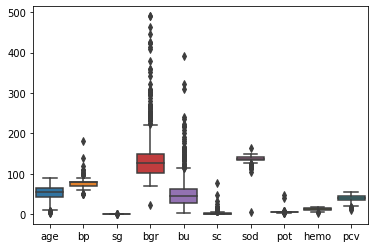

In [76]:
#boxplot to observe outliners
fig=sns.boxplot(data=f.loc[:,l1[1:-2]])

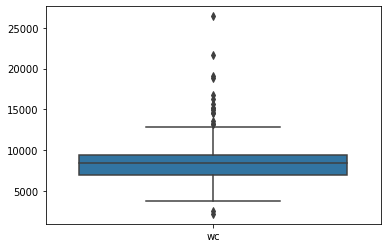

In [77]:
fo=sns.boxplot(data=f.loc[:,["wc"]])

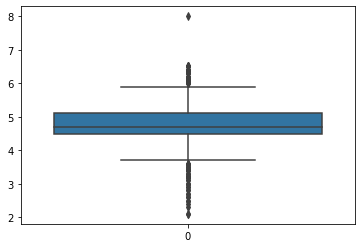

In [78]:
fo1=sns.boxplot(data=f.loc[:,"rc"])

In [79]:
import plotly.express as px
f1=px.box(f.loc[:,l1[:-2]],y=l1[:-2])
f1.show()


# Handling outliers

In [80]:
import numpy as np
def outlienes(col):

    Q1 = np.percentile(f[col], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(f[col], 75,
                       interpolation = 'midpoint')
    
    per_95 = np.percentile(f[col], 95,
                       interpolation = 'midpoint')
    
    IQR = Q3 - Q1
    
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    
    f[col] = np.where(f[col] > upper, per_95, f[col])
    f[col] = np.where(f[col] < lower, lower, f[col])

    return f



for col in l1:
    f = outlienes(col)

C:\Users\sai charan\AppData\Local\Temp\ipykernel_10332\3684785094.py:4: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

C:\Users\sai charan\AppData\Local\Temp\ipykernel_10332\3684785094.py:7: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

C:\Users\sai charan\AppData\Local\Temp\ipykernel_10332\3684785094.py:10: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)



In [81]:
#values after replacing outliners 
f2=px.box(f.loc[:,l1[:-2]],y=l1[:-2])
f2.show()

<AxesSubplot:>

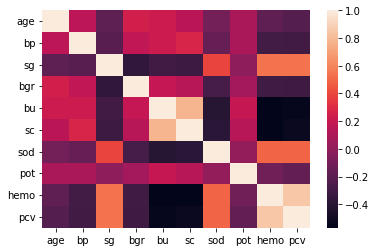

In [82]:
sns.heatmap(f[l1[1:-2]].corr())

# Converting categorical attributes to numaric

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in l2:
    f[i]=le.fit_transform(f[i])

In [84]:
for i in f:
    print(f[i])

0        0.0
1        1.0
2        2.0
3        3.0
4        4.0
       ...  
395    395.0
396    396.0
397    397.0
398    398.0
399    399.0
Name: id, Length: 400, dtype: float64
0      48.0
1       9.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64
0      80.0
1      55.0
2      80.0
3      70.0
4      80.0
       ... 
395    80.0
396    70.0
397    80.0
398    60.0
399    80.0
Name: bp, Length: 400, dtype: float64
0      1.0200
1      1.0200
2      1.0100
3      1.0075
4      1.0100
        ...  
395    1.0200
396    1.0250
397    1.0200
398    1.0250
399    1.0250
Name: sg, Length: 400, dtype: float64
0      1
1      4
2      2
3      4
4      2
      ..
395    0
396    0
397    0
398    0
399    0
Name: al, Length: 400, dtype: int64
0      0
1      0
2      3
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: su, Length: 400, dtype: int64
0      1
1      

In [85]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int32  
 7   pc              400 non-null    int32  
 8   pcc             400 non-null    int32  
 9   ba              400 non-null    int32  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

# Test and Train split of data

In [86]:
from sklearn.model_selection import train_test_split
l3=f.columns
l3=l3[:-1]
l3=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']
print(l3)
x_train,x_test,y_train,y_test=train_test_split(f.loc[:,l3],f.classification,test_size=0.3,random_state=0)

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [87]:
x_train.shape

(280, 20)

In [88]:
x_train.head()

,age,bp,sg,al,su,rbc,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
92,71.0,70.0,1.010,3,0,1,219.000000,82.000000,3.600000,133.000000,4.400000,10.400000,5600.000000,3.600000,1,1,1,0,0,0
223,71.0,90.0,1.010,0,3,1,303.000000,30.000000,1.300000,136.000000,4.100000,13.000000,9200.000000,4.600000,1,1,0,0,0,0
234,37.0,100.0,1.010,0,0,0,148.036517,19.000000,1.300000,137.528754,4.627244,15.000000,4100.000000,5.200000,1,0,0,0,0,0
232,50.0,90.0,1.015,1,0,0,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,8406.122449,4.707435,0,0,0,0,1,0
377,64.0,70.0,1.020,0,0,1,97.000000,27.000000,0.700000,145.000000,4.800000,13.800000,6400.000000,4.800000,0,0,0,0,0,0


In [89]:
y_train.head()

92     1
223    1
234    1
232    1
377    0
Name: classification, dtype: int64

# Classification using Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(splitter="random",random_state=1,max_depth=6)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1, splitter='random')

In [91]:
from sklearn.metrics import accuracy_score
print("The accuracy of decision tree is:",accuracy_score(y_test,dt.predict(x_test)))

The accuracy of decision tree is: 0.9416666666666667


In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.92        48
           1       0.93      0.97      0.95        72

    accuracy                           0.94       120
   macro avg       0.94      0.93      0.94       120
weighted avg       0.94      0.94      0.94       120



# Classification using RandomForest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=7,random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=7, random_state=0)

In [94]:
print("The accuracy of randomforest is:",accuracy_score(y_test,rf.predict(x_test)))

The accuracy of randomforest is: 0.9833333333333333


In [95]:
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        72

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [96]:
t2=pd.DataFrame({'age':[48,48],'bp':[80,70],'sg':[1.02,1.0075],'al':[1,4],'su':[0,0],'rbc':[1,1],'pc':[1,0],'pcc':[0,1],'ba':[0,0],'bgr':[121,117],'bu':[36,56],'sc':[1.2,3.8],'sod':[137.52,126],'pot':[4.6,2.8],'hemo':[15.4,11.2],'pcv':[44,32],'wc':[7800,6700],'rc':[5.2,3.9],'htn':[1,1],'dm':[1,0],'cad':[0,0],'appet':[0,1],'pe':[0,1],'ane':[0,1]})

In [97]:
print(t2)

   age  bp      sg  al  su  rbc  pc  pcc  ba  bgr  ...  hemo  pcv    wc   rc  \
0   48  80  1.0200   1   0    1   1    0   0  121  ...  15.4   44  7800  5.2   
1   48  70  1.0075   4   0    1   0    1   0  117  ...  11.2   32  6700  3.9   

   htn  dm  cad  appet  pe  ane  
0    1   1    0      0   0    0  
1    1   0    0      1   1    1  

[2 rows x 24 columns]


In [98]:
print(rf.predict(t2.loc[:,l3]))

[1 1]


# Deployment Through streamlit app

In [99]:
import pickle
po=open("rf.pkl","wb")
pickle.dump(rf,po)
po.close()